In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from libs.pizzaiolo import Pizzaiolo
from PIL import Image, ImageOps
from pprint import pp

# Initialization

In [3]:
ontology_filename = "libs/ontologies/pizzaiolo.xml"
pizzaiolo = Pizzaiolo(ontology_filename)
ontology = pizzaiolo.getOntology()

# Dataset Generation

In [4]:
pizza_types = [
    ontology.American,
    ontology.AmericanHot,
    ontology.Cajun,
    ontology.Capricciosa,
    ontology.Fiorentina,
    ontology.FourSeasons,
    ontology.Giardiniera,
    ontology.LaReine,
    ontology.Mushroom,
    ontology.Napoletana,
    ontology.Parmense,
    ontology.Siciliana,
    ontology.SloppyGiuseppe,
    ontology.Soho,
    ontology.Veneziana,
    None # Random Pizza
]
number_of_each = 5
dataset_dir = "./DEMO_SAMPLE_pizzaiolo_dataset/"

In [5]:
pizzaiolo.cook(pizza_types, number_of_each=number_of_each, delivery_dir=dataset_dir)

# Check

In [6]:
df = Pizzaiolo.loadCSV(dataset_dir, Pizzaiolo.CSV_FILENAME)
df.sample(frac=0.1)

,img_name,type,hasTopping,AnchoviesTopping,GarlicTopping,GreenPepperTopping,HamTopping,JalapenoPepperTopping,MushroomTopping,OliveTopping,...,PrawnsTopping,RocketTopping,SlicedTomatoTopping,SpinachTopping,SultanaTopping,hasBase,hasCountryOfOrigin,boxes_name,contours_name,segmentation_name
ref,,,,,,,,,,,,,,,,,,,,,
img_00058,img_00058.png,Siciliana,"[AnchoviesTopping, HamTopping, OliveTopping, G...",5,5,0,4,0,0,9,...,0,0,0,0,0,ThinAndCrispyBase,Italy,img_00058_bboxes.json,img_00058_contours.json,img_00058_segmentation.txt
img_00063,img_00063.png,SloppyGiuseppe,"[GreenPepperTopping, OnionTopping]",0,0,5,0,0,0,0,...,0,0,0,0,0,ThinAndCrispyBase,Italy,img_00063_bboxes.json,img_00063_contours.json,img_00063_segmentation.txt
img_00059,img_00059.png,Siciliana,"[AnchoviesTopping, HamTopping, OliveTopping, G...",5,6,0,4,0,0,8,...,0,0,0,0,0,ThinAndCrispyBase,Italy,img_00059_bboxes.json,img_00059_contours.json,img_00059_segmentation.txt
img_00003,img_00003.png,American,"[PeperonataTopping, PeperoniSausageTopping]",0,0,0,0,0,0,0,...,0,0,0,0,0,DeepPanBase,America,img_00003_bboxes.json,img_00003_contours.json,img_00003_segmentation.txt
img_00004,img_00004.png,American,"[PeperonataTopping, PeperoniSausageTopping]",0,0,0,0,0,0,0,...,0,0,0,0,0,DeepPanBase,America,img_00004_bboxes.json,img_00004_contours.json,img_00004_segmentation.txt
img_00015,img_00015.png,Capricciosa,"[AnchoviesTopping, PeperonataTopping, OliveTop...",5,0,0,4,0,0,10,...,0,0,0,0,0,ThinAndCrispyBase,NaN,img_00015_bboxes.json,img_00015_contours.json,img_00015_segmentation.txt
img_00014,img_00014.png,Cajun,"[PeperonataTopping, PrawnsTopping, OnionTopping]",0,0,0,0,0,0,0,...,6,0,0,0,0,ThinAndCrispyBase,NaN,img_00014_bboxes.json,img_00014_contours.json,img_00014_segmentation.txt
img_00027,img_00027.png,FourSeasons,"[AnchoviesTopping, PeperoniSausageTopping, Oli...",4,0,0,0,0,10,6,...,0,0,0,0,0,ThinAndCrispyBase,NaN,img_00027_bboxes.json,img_00027_contours.json,img_00027_segmentation.txt


In [7]:
num = -1

img_name                                                img_00000.png
type                                                         American
hasTopping                [PeperonataTopping, PeperoniSausageTopping]
AnchoviesTopping                                                    0
GarlicTopping                                                       0
GreenPepperTopping                                                  0
HamTopping                                                          0
JalapenoPepperTopping                                               0
MushroomTopping                                                     0
OliveTopping                                                        0
OnionTopping                                                        0
ParmesanTopping                                                     0
PeperonataTopping                                                   1
PeperoniSausageTopping                                              6
PrawnsTopping       

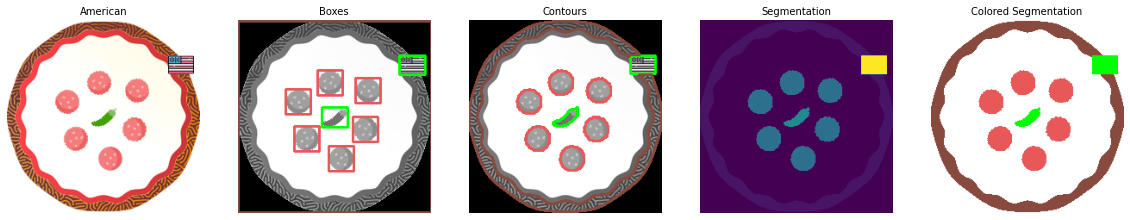

In [8]:
num += 1
sample = df.iloc[num]
display(sample)

img = Pizzaiolo.loadImage(dataset_dir, sample.img_name)

image_with_boxes = pizzaiolo.drawAllBoxes(
    ImageOps.grayscale(img.copy()).convert('RGB'),
    Pizzaiolo.loadBoxes(dataset_dir, sample.boxes_name))

toppings_contours = Pizzaiolo.loadContours(dataset_dir, sample.contours_name)

image_with_contours = pizzaiolo.drawAllContours(
    ImageOps.grayscale(img.copy()).convert('RGB'),
    toppings_contours,
    thickness=2 
)

segmentation = pizzaiolo.loadSegmentation(dataset_dir, sample.segmentation_name)
colored_segmentation = pizzaiolo.colorSegmentation(segmentation)

pizzaiolo.display(
    [img, image_with_boxes, image_with_contours, segmentation, colored_segmentation],
    titles=[sample.type, "Boxes", "Contours", "Segmentation", "Colored Segmentation"],
    figsize=(20, 8)
)

# Segmentation Topping Ids

In [9]:
# segmentation ids
topping_ids = Pizzaiolo.loadToppingTypes(dataset_dir)
pp(topping_ids)

OrderedDict([(0, 'None'),
             (1, 'DeepPanBase'),
             (2, 'ThinAndCrispyBase'),
             (3, 'ParmesanTopping'),
             (4, 'SlicedTomatoTopping'),
             (5, 'GreenPepperTopping'),
             (6, 'OnionTopping'),
             (7, 'PeperoniSausageTopping'),
             (8, 'HamTopping'),
             (9, 'PeperonataTopping'),
             (10, 'RocketTopping'),
             (11, 'SpinachTopping'),
             (12, 'JalapenoPepperTopping'),
             (13, 'AnchoviesTopping'),
             (14, 'MushroomTopping'),
             (15, 'PrawnsTopping'),
             (16, 'OliveTopping'),
             (17, 'SultanaTopping'),
             (18, 'GarlicTopping'),
             (19, 'America'),
             (20, 'England'),
             (21, 'France'),
             (22, 'Italy')])


# Split

In [10]:
Pizzaiolo.splitDataset(dataset_dir, train_size=0.6, valid_size=0.2, test_size=0.2)

In [11]:
train_csv = Pizzaiolo.loadCSV(dataset_dir, Pizzaiolo.CSV_TRAIN_FILENAME)
print(len(train_csv))

48


In [12]:
valid_csv = Pizzaiolo.loadCSV(dataset_dir, Pizzaiolo.CSV_VALID_FILENAME)
print(len(valid_csv))

16


In [13]:
test_csv = Pizzaiolo.loadCSV(dataset_dir, Pizzaiolo.CSV_TEST_FILENAME)
print(len(test_csv))

16
